# Example: Fit Catalogue with Stardust

In [1]:
import stardust
import numpy as np

Imported filters from filters/filters.txt
Successfully imported the IGM module from EAZY


Load in the class by providing the path to the .config file.

In [2]:
kwargs = {'custom_gamma':[0.02,0.04,0.06,0.08,.1],
          'custom_qpah_indices':[1,2,3,4,5,6,7,8,9,], 
          'custom_umin_indices': np.array([16,17,18,19])}

# If necessary you can adjust which templates are being used

self = stardust.main.ctf(config_file='example.config',)#**kwargs)

READ CONFIG FILE example.config
Read a catalogue with 300 objects
Read band file: stellar+ir/example.bands
Read param file: stellar+ir/example.param
Using Legacy Format
Detected the following parameters ['ID', 'z', 'Mstar']
Input Bands: ok
Input Filters: ok
Data Loaded Successfully
Objects to Fit: 300


/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:399: RuntimeWarning: invalid value encountered in divide
  sn = self.fnu[i]/self.efnu[i]


We can double check what parameters are in the config file

These can also be changed manually after loading the module e.g.

In [ ]:
self.config['OUTPUT_NAME'] = 'example_name'

Fit a single object from the catalogue and show its SED

/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:1313: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1000x500 with 1 Axes>,
 {'lambda': array([3.87860211e-02, 4.00646811e-02, 4.09171211e-02, ...,
         1.14531979e+06, 1.24245395e+06, 1.34782602e+06]),
  'templ_optical': array([7.08521412e-48, 7.30026702e-44, 2.10069478e-41, ...,
         3.54247904e-09, 3.25568935e-09, 2.99283779e-09]),
  'templ_agn': array([0., 0., 0., ..., 0., 0., 0.]),
  'templ_ir': array([2.70862424e-52, 5.77740070e-52, 9.44653412e-52, ...,
         5.38171679e-09, 4.24363442e-09, 3.34622459e-09]),
  'pivot': array([2.15030000e+00, 1.02170000e+00, 1.64330000e+00, 1.25270000e+00,
         4.44800000e-01, 5.47020000e-01, 7.67120000e-01, 6.27550000e-01,
         3.83790000e-01, 9.02820000e-01, 4.84730000e-01, 5.25930000e-01,
         6.23080000e-01, 6.78160000e-01, 7.35950000e-01, 4.26000000e-01,
         4.63330000e-01, 5.06080000e-01, 5.76290000e-01, 7.07350000e-01,
         8.24680000e-01, 7.12020000e-01, 8.15090000e-01, 3.55690000e+00,
         4.50200000e+00, 5.74500000e+00, 7.91580000e+00, 2.37

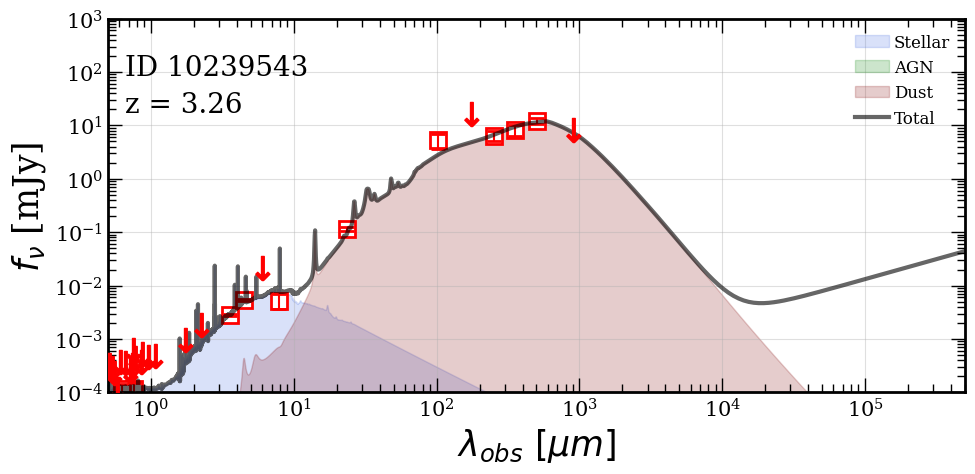

In [3]:
idx = 0
self.fit_object(idx)
self.show_fit(idx,radio=True)

We can also fit the entire catalogue

In [4]:
n_obj = 300 #Number of objects to fit, leave blank to fit everything
n_proc = -1 #Number of threads to use, -1 for all available threads, 1 for serial mode
self.fit_catalogue(n_proc=n_proc,n_obj=n_obj)

Begin Multithreading
12 threads utilised


 21%|██        | 63/300 [00:26<01:49,  2.17it/s]/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:832: RuntimeWarning: invalid value encountered in divide
  efnu[(fnu/efnu)<=3]*=3
 44%|████▍     | 133/300 [00:54<01:40,  1.66it/s]/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:832: RuntimeWarning: invalid value encountered in divide
  efnu[(fnu/efnu)<=3]*=3
100%|██████████| 300/300 [01:53<00:00,  2.64it/s]


Finished Fitting, Preparing Output..


/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:913: RuntimeWarning: invalid value encountered in divide
  coeffs_norm = self.best_coeffs[idx,:12]/np.sum(self.best_coeffs[idx,:12])
/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:980: RuntimeWarning: invalid value encountered in divide
  coeffs_norm_resampled = (resampled_coeffs[:,:12].T/np.sum(resampled_coeffs[:,:12],axis=1)).T
/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:1107: RuntimeWarning: overflow encountered in scalar power
  deltaGDR=10**(10.54-0.99*met_PP04)
/Users/vasily/miniconda3/envs/dev/lib/python3.9/site-packages/stardust/main.py:1033: RuntimeWarning: divide by zero encountered in divide
  A/=self.efnu[idx]


Time Elapsed: 150.30397605895996 s


Access outputs for each object

Mstar: 8.71 +- 0.50


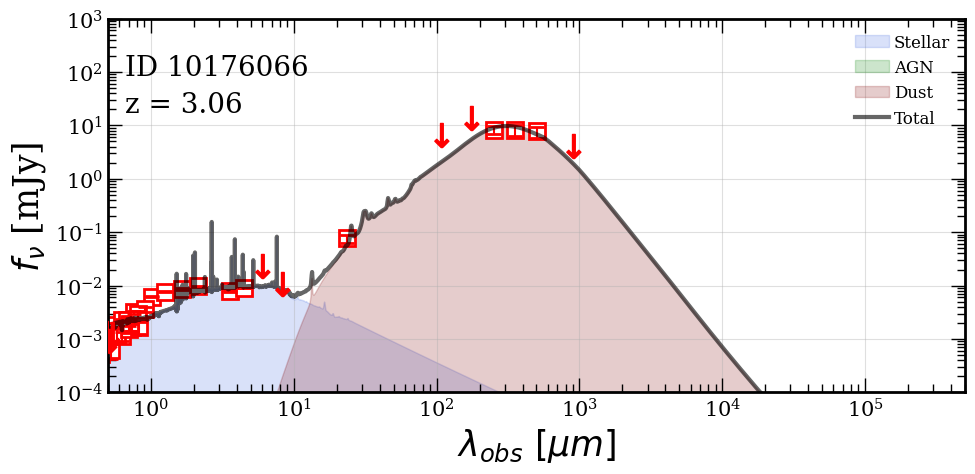

In [9]:
idx = 20
self.show_fit(idx)

#All the physical parameters like mstar, mdust and lir are contained within the self class
#These can be accessed like so
dust_mass = np.log10(self.mdust[idx])
e_dust_mass = self.e_mdust[idx]/self.mdust[idx]*np.log(10)**-1

print(r'Mstar: {:.2f} +- {:.2f}'.format(dust_mass,e_dust_mass))




Alternatively, we can just look at the output table

In [ ]:
self.tab

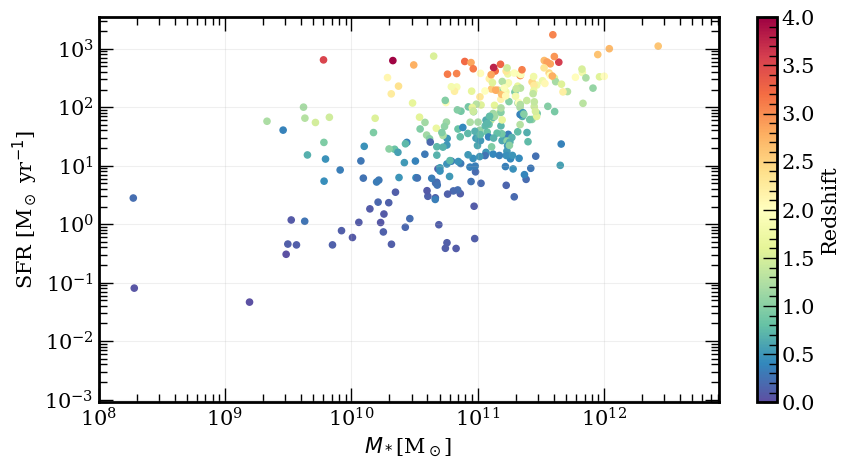

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.scatter(self.tab['mstar'],self.tab['sfr'],c=self.tab['z'],s=20,vmin=0,vmax=4,cmap='Spectral_r')
plt.colorbar(label='Redshift')
plt.loglog()
plt.xlim(1e8,)
plt.ylabel(r'SFR [M$_\odot$ yr$^{-1}$]')
plt.xlabel(r'$M_*$[M$_\odot$]')
plt.grid(alpha=.2)

In [ ]:
self.set_ztemps()

In [17]:
self.zcat

3.262200117111206
0.12460000067949295
0.24740000069141388
0.6700000166893005
2.572499990463257
0.7372999787330627
1.05649995803833
0.03999999910593033
1.5326000452041626
1.4388999938964844
0.6700000166893005
